In [2]:
options(repr.plot.width=4, repr.plot.height=3)

# Simple Linear Model

$$Y = \beta_0 + \beta_1X + \epsilon$$

$\beta_0$ = intercept, value of y when x = 0

$\beta_1$ = slope, change in y when x changes 1 unit

Y is the dependent (response) variable

X is the independent (covariate) variable

**Assumptions** 

- Linearity
- X's are fixed constants
- $\epsilon_i \stackrel{iid}{\sim} N(0, \sigma^2)$ 

## Example

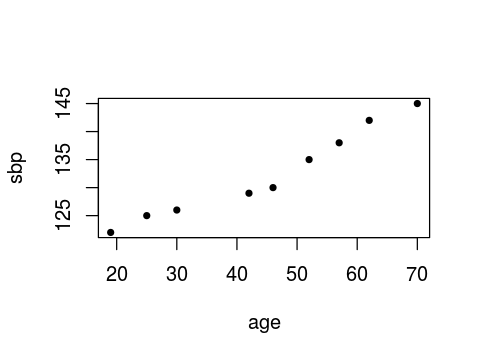

In [3]:
age <- c( 19,  25,  30,  42,  46,  52,  57,  62,  70)
sbp <- c(122, 125, 126, 129, 130, 135, 138, 142, 145)
plot(age, sbp, pch=20)

Let $\epsilon_i = Y_i - \beta_0 - \beta_1 X_i$ 

Let $Q = \sum_{i=1}^n \epsilon_i$

<br/>

minimize Q  

- $\frac{\partial Q}{\partial \beta_0} = 0$

- $\frac{\partial Q}{\partial \beta_1} = 0$

**solving the above get the below**

$$\hat{\beta_0} = \bar{Y} - \hat{\beta_1} X$$

$$\hat{\beta_1}=\frac{
    \sum_{i=1}^n X_i Y_i - \frac{1}{n} \sum_{i=1}^n X_i \sum_{i=1}^n Y_i
}{
    \sum_{i=1}^n X_i X_i - \frac{1}{n} \sum_{i=1}^n X_i \sum_{i=1}^n X_i
}=\frac{
    \sum_{i=1}^n (X_i - \bar{X}) (Y_i - \bar{Y})
}{
    \sum_{i=1}^n (X_i - \bar{X}) (X_i - \bar{X})
}$$

**Estimate error variance by mean square error**

$$\text{MSE} = \hat{\sigma}^2 = S_{y.x}^2 = \frac{1}{n-2} \sum (Y_i - \hat{Y_i})^2$$

$$\text{Residual} = r_i = Y_i - \hat{Y_i}$$

In [4]:
n <- length(age)
x <- age
y <- sbp

bar_X  <- mean(x)
bar_Y  <- mean(y)
sum_X  <- sum(x)
sum_Y  <- sum(y)
sum_XY <- sum(x*y)
sum_X2 <- sum(x^2)
sum_Y2 <- sum(y^2)

cat("",
    "X bar: ", bar_X,  "\n",
    "Y bar: ", bar_Y,  "\n",
    "X sum: ", sum_X,  "\n",
    "Y sum: ", sum_Y,  "\n",
    "sum XY:", sum_XY, "\n",
    "sum X2:", sum_X2, "\n",
    "sum Y2:", sum_Y2)

 X bar:  44.77778 
 Y bar:  132.4444 
 X sum:  403 
 Y sum:  1192 
 sum XY: 54461 
 sum X2: 20463 
 sum Y2: 158384

In [5]:
beta_1 <- (sum_XY - 1/n * sum_X * sum_Y) / (sum_X2 - 1/n * sum_X * sum_X)
beta_0 <- bar_Y - beta_1 * bar_X

cat("beta_0: ", beta_0, "\n")
cat("beta_1: ", beta_1)

beta_0:  112.3317 
beta_1:  0.4491681

## Intepretation

**$\hat{\beta_1} = 0.45$**

if you compared two people, one with an age that was one year older than the other, we would expect, on average, that the person with the older age would have a systolic blood pressure that is 0.45 (mmHg)

$\hat{\beta_0} = 112.3$

depends on whether it is measuring something meaningful or not  
$\hat{\beta_0}$ is the predicted $\hat{Y}$ at x = 0
<br/>
- If x = 0 is within the range of your data
    - then $\hat{\beta_0}$ is interpreted as that predicted value
<br/>
<br/>
- If x = 0 is NOT within the range of your data
    - then $\hat{\beta_0}$ is merely a centering constant. Its role is to shift the line vertically (up and down) so that it falls in teh midst of all the data

# Variance of statistics

$\hat{\beta_1} = \frac{
    \sum_{i=1}^n (X_i - \bar{X}) (Y_i - \bar{Y})
}{
    \sum_{i=1}^n (X_i - \bar{X}) (X_i - \bar{X})
} = \frac{
    \sum_{i=1}^n (X_i - \bar{X}) Y_i
}{
    \sum_{i=1}^n (X_i - \bar{X}) (X_i - \bar{X})
} - \frac{
    \sum_{i=1}^n (X_i - \bar{X}) \bar{Y}
}{
    \sum_{i=1}^n (X_i - \bar{X}) (X_i - \bar{X})
} = \frac{
    \sum_{i=1}^n (X_i - \bar{X}) Y_i
}{
    \sum_{i=1}^n (X_i - \bar{X}) (X_i - \bar{X})
} - \frac{
    \bar{Y} \sum_{i=1}^n (X_i - \bar{X}) 
}{
    \sum_{i=1}^n (X_i - \bar{X}) (X_i - \bar{X})
} = \frac{
    \sum_{i=1}^n (X_i - \bar{X}) Y_i
}{
    \sum_{i=1}^n (X_i - \bar{X}) (X_i - \bar{X})
} = \sum c_i Y_i$

where $c_i$ is 
$\frac{
    X_i - \bar{X}
}{
    \sum_{i=1}^n (X_i - \bar{X}) (X_i - \bar{X})
}$

since we want to derive the variation of $\hat{\beta_1}$, which is $\sum c_i^2 \text{var}(Y_i) = \text{var}(Y_i) \sum c_i^2$ 

Therefore, we need to figure out $\sum c_i^2$

-----

Therefore, we have follow equations

$$var(\hat{\beta_1}) = \frac{\sigma^2}{\sum(X_i - \bar{X})^2}$$

$$var(\hat{\beta_0}) = \sigma^2 \Big[ \frac{1}{n} + \frac{\bar{X}^2}{\sum(X_i - \bar{X})^2} \Big]$$

Esitmating variation by changing $\sigma^2$ as $s_{y.x}^2$

$$\widehat{var(\hat{\beta_1})} = \frac{S_{y.x}^2}{\sum(X_i - \bar{X})^2}$$

$$\widehat{var(\hat{\beta_0})} = S_{y.x}^2 \Big[ \frac{1}{n} + \frac{\bar{X}^2}{\sum(X_i - \bar{X})^2} \Big]$$

Since $\hat{\beta_1}$ is a function of $Y_i$
$$\hat{\beta_1} = \sum c_i Y_i$$

In addition, $Y_i \sim Normal$, so we can know that **$\hat{\beta_1}$ also has an Normal distribution**. This is the reason why we could **perform hypothesis test** and **calculate confidence interval** of $\hat{\beta_1}$ 

Moreover, since $\hat{\beta_1}$ is normal, and also $\hat{\beta_0}$ depends on $\hat{\beta_1}$ as follow
$$\hat{\beta_0} = \bar{Y} - \hat{\beta_1} \bar{X}$$

we could then conclude that $\hat{\beta_0}$ is as well normal

# Hypothesis Test of parameters

# Confidence Interval (CI) and Prediction Interval (PI)

# Total Variability & Sum of Squares Partition

## SST = SSR + SSE

Least sum of square minimize SSE and since SST is fixed, such method is also maximize SSR

### Problem of SSE

## R-square

### Unadjust $R^2$

$$R^2 = \frac{SSR}{SST} = 1 - \frac{SSE}{SST}$$

### Adjust $R^2$

$$R_{adj}^2 = \frac{MSR}{MST} = 1 - \frac{MSE}{MST}$$

### $R^2$ vs $R_{adj}^2$

$$R_{adj}^2 = 1 - \frac{MSE}{MST} = 1 - \frac{ \frac{SSE}{n-2} }{ \frac{SST}{n-1} } = 1 - \frac{(n-1) SSE}{(n-2) SST} = 1 - \frac{n-1}{n-2} (1 - R^2)$$

## Analysis of Variance

**MST** = variance of observation Y  
**MSR** = variance of observation $\hat{Y}$  
**MSE** = variance of residuals  

$\frac{Variance 1}{Variance 2} \sim$ F distribution